In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa, librosa.display

import tensorflow as tf 
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [2]:
from tensorflow.keras import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Input, LSTM, GRU, Dense, Embedding, Conv1D, MaxPooling1D, Activation, Dropout
from tensorflow.keras.layers import Reshape, Softmax, Permute, Multiply, dot, concatenate
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report

## DATALOADER

In [ ]:
X_train = np.load('/content/gdrive/MyDrive/data/Augmented1/X_train.npy')
y_train = np.load('/content/gdrive/MyDrive/data/Augmented1/y_train.npy')
X_test = np.load('/content/gdrive/MyDrive/data/Augmented1/X_test.npy')
y_test = np.load('/content/gdrive/MyDrive/data/Augmented1/y_test.npy')
X_val = np.load('/content/gdrive/MyDrive/data/Augmented1/X_val.npy')
y_val = np.load('/content/gdrive/MyDrive/data/Augmented1/y_val.npy')

In [ ]:
X_train[0].shape

(98,)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(16893, 98) (16893, 2)
(2109, 98) (2109, 2)
(2088, 98) (2088, 2)


## CRNN - Review Later

In [3]:
inputs = Input(shape=(98,1))
conv1 = Conv1D(32, 5, activation='relu',kernel_regularizer=l2(0.01))(inputs)
pool1 = MaxPooling1D(2)(conv1)
conv2 = Conv1D(64, 5, activation='relu')(pool1)
pool2 = MaxPooling1D(2)(conv2)
conv3 = Conv1D(128, 5, activation='relu')(pool2)
pool3 = MaxPooling1D(2)(conv3)

gru1 = GRU(128, return_sequences=True)(pool3)
gru1 = Dropout(0.2)(gru1)
lstm1 = LSTM(128)(gru1)

q = Dense(128)(lstm1)
k = Dense(128)(lstm1)
v = Dense(128)(lstm1)

q = Reshape((1, 128))(q)
k = Reshape((1, 128))(k)
v = Reshape((1, 128))(v)

attention = dot([q, k], axes=[2, 2])
attention = Activation('softmax')(attention)

output = dot([attention, v], axes=[2, 1])
output = Reshape((128,))(output)

output = Dense(2, activation='softmax')(output)

model = Model(inputs=inputs, outputs=output)

In [4]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 98, 1)]      0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 94, 32)       192         ['input_1[0][0]']                
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 47, 32)       0           ['conv1d[0][0]']                 
                                                                                                  
 conv1d_1 (Conv1D)              (None, 43, 64)       10304       ['max_pooling1d[0][0]']          
                                                                                              

In [ ]:
model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(amsgrad=True),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 120, shuffle = False)

Epoch 1/120
528/528 [==============================] - 26s 40ms/step - loss: 0.4080 - accuracy: 0.8007 - val_loss: 0.2332 - val_accuracy: 0.9176
Epoch 2/120
528/528 [==============================] - 19s 36ms/step - loss: 0.2119 - accuracy: 0.9255 - val_loss: 0.2251 - val_accuracy: 0.9262
Epoch 3/120
528/528 [==============================] - 20s 38ms/step - loss: 0.1802 - accuracy: 0.9364 - val_loss: 0.2121 - val_accuracy: 0.9277
Epoch 4/120
528/528 [==============================] - 20s 38ms/step - loss: 0.1625 - accuracy: 0.9447 - val_loss: 0.2076 - val_accuracy: 0.9306
Epoch 5/120
528/528 [==============================] - 20s 37ms/step - loss: 0.1453 - accuracy: 0.9492 - val_loss: 0.2061 - val_accuracy: 0.9358
Epoch 6/120
528/528 [==============================] - 20s 37ms/step - loss: 0.1332 - accuracy: 0.9539 - val_loss: 0.1855 - val_accuracy: 0.9444
Epoch 7/120
528/528 [==============================] - 19s 37ms/step - loss: 0.1243 - accuracy: 0.9567 - val_loss: 0.1755 - val_ac

In [ ]:
model.save("CRNN-GRULSTM-Augmented.h5")
print("Model Score: \n")
score = model.evaluate(X_test, y_test)
print(score)

Model Score: 

66/66 [==============================] - 1s 11ms/step - loss: 0.1479 - accuracy: 0.9768
[0.14790622889995575, 0.9767662286758423]


##METRICS

In [ ]:
pip install plot_keras_history

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 KB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for plot_keras_history: filename=plot_keras_history-1.1.38-py3-none-any.whl size=9472 sha256=0eee47481b5dd9e302dd9b06b7d1d6810b7ce9e25e9530a962e7ee185db92e1f
  Stored in directory: /root/.cache/pip/wheels/97/a5/76/35ae3e15da1ce4530de8591b0bcd7716f6d6752a4808f01c04
  Created wheel for sanitize_ml_labels: filename=sanitize_ml_labels-1.0.50-py3-none-any.whl size=320514 sha256=e9acdba3f297ba93e7c423aea2b8cf4278cfc1ff982ad2d2b09aab0553f84122
  Stored in directory: /root/.cache/pip/wheels/a3/5f/ba/ddd191edb6c749a63cffabd28714d5600b5b58014daf7434a8
  Created wheel for support_developer: filename=support_developer-1.0.5-py3-none-any.whl siz

(<Figure size 1000x500 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <AxesSubplot:title={'center':'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

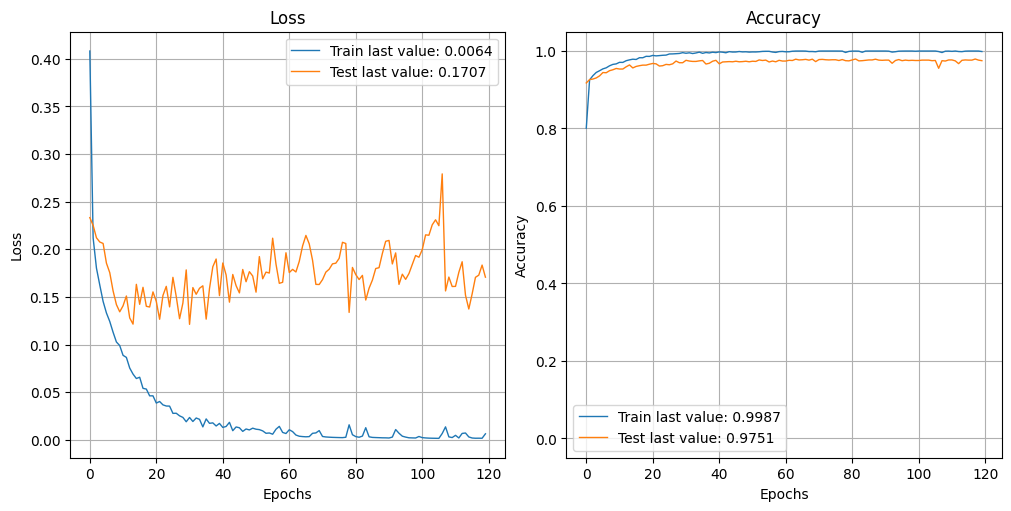

In [ ]:
from plot_keras_history import show_history, plot_history
plot_history(history)

In [ ]:
import matplotlib.pyplot as plt
import itertools
import numpy as np

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Model Classification Report: 

66/66 [==============================] - 2s 11ms/step
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1049
           1       0.97      0.98      0.98      1060

    accuracy                           0.98      2109
   macro avg       0.98      0.98      0.98      2109
weighted avg       0.98      0.98      0.98      2109

Confusion matrix, without normalization
[[1019   30]
 [  19 1041]]


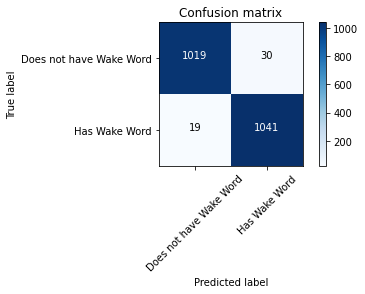

In [ ]:
print("Model Classification Report: \n")
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print(classification_report(np.argmax(y_test, axis=1), y_pred))
plot_confusion_matrix(cm, classes=["Does not have Wake Word", "Has Wake Word"])

##PREDICTIONS & LATENCY


In [ ]:
pip install spafe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 KB 3.9 MB/s eta 0:00:00


In [ ]:
import spafe
from spafe.features.lfcc import lfcc
import pywt

In [ ]:
def predict(audio):
  audio_data, sr = librosa.load(audio)

  wavelet = 'db4'
  level = 4
  coeffs = pywt.wavedec(audio_data, wavelet, level=level)
  threshold = np.median(np.abs(coeffs[-level])) / 0.6745
  for i in range(1, len(coeffs)):
    coeffs[i] = pywt.threshold(coeffs[i], threshold)
  denoised_audio = pywt.waverec(coeffs, wavelet)

  lfccs  = lfcc(denoised_audio, fs = sr, num_ceps=13)
  lfccs_processed = np.mean(lfccs.T, axis=0) # some pre-processing
  lfccs_new = np.expand_dims(np.asarray(lfccs_processed), axis=0)
  predictions = model.predict(lfccs_new)
  return predictions

In [ ]:
audio_for_pred = "/content/gdrive/MyDrive/Marvin/marvin (170).wav"
print(np.round(predict(audio_for_pred)))

1/1 [==============================] - 0s 65ms/step
[[0. 1.]]


In [ ]:
audio_for_pred = "/content/gdrive/MyDrive/False/yes (824).wav"
print(np.round(predict(audio_for_pred)))

1/1 [==============================] - 0s 26ms/step
[[1. 0.]]
